In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "krylov_data"
all_files = os.listdir(data_dir)
assert "hubbard_exact.h5" in all_files
ev_files = [f for f in all_files if "eigenvalues" in f]
print(len(ev_files))

11


In [3]:
# Get the exact energy.
f_exact = h5py.File(data_dir + "/hubbard_exact.h5", "r")
energy_exact = np.min(f_exact["energies"])
print(f"Exact energy is {energy_exact}.")
f_exact.close()

Exact energy is (1.0717967697244906+0j).


In [41]:
dfs = []
for evf in ev_files:
    fname = data_dir + "/" + evf
    # Get the number of steps.
    f = h5py.File(fname, "r")
    steps = f["steps"][()]
    f.close()
    # Get the upper bound.
    fname2 = fname.replace("eigenvalues", "bound")
    bound_df = pd.read_hdf(fname2)
    # Get the dataframe with energy vs. d
    df = pd.read_hdf(fname, key="eigenvalues")
    df["error"] = abs(df["energy"] - energy_exact) / abs(energy_exact)
    df["steps"] = steps
    df.set_index("d")
    df_concat = pd.concat([df, bound_df], axis=1)
    dfs.append(df_concat)
df_total = pd.concat(dfs)
print(df_total)

       d           eps    energy  num_pos     error  steps  s_distance  \
0    3.0  1.000000e-12  1.072688      3.0  0.000832  150.0    0.000000   
1    4.0  1.000000e-12  1.072114      4.0  0.000296  150.0    0.001369   
2    5.0  1.000000e-12  1.072029      5.0  0.000216  150.0    0.005476   
3    6.0  1.000000e-12  1.071962      6.0  0.000154  150.0    0.012320   
4    7.0  1.000000e-12  1.071920      7.0  0.000115  150.0    0.021903   
..   ...           ...       ...      ...       ...    ...         ...   
25  28.0  1.000000e-12  1.071666     19.0  0.000122   20.0    6.416814   
26  29.0  1.000000e-12  1.071640     20.0  0.000146   20.0    6.940426   
27  30.0  1.000000e-12  1.071595     20.0  0.000189   20.0    7.484572   
28   NaN           NaN       NaN      NaN       NaN    NaN    8.049252   
29   NaN           NaN       NaN      NaN       NaN    NaN    8.634465   

          bound  
0   1749.333334  
1   1584.174857  
2   1526.517779  
3   1644.816770  
4   2162.124875  
.. 

In [54]:
df_small = df_total[df_total["d"] >= 20]
print(df_small)

       d           eps    energy  num_pos         error  steps  s_distance  \
17  20.0  1.000000e-12  1.071799     15.0  2.458693e-06  150.0    0.395618   
18  21.0  1.000000e-12  1.071798     15.0  1.130169e-06  150.0    0.443530   
19  22.0  1.000000e-12  1.071796     16.0  2.522591e-07  150.0    0.494180   
20  23.0  1.000000e-12  1.071795     17.0  1.496976e-06  150.0    0.547568   
21  24.0  1.000000e-12  1.071794     17.0  2.435788e-06  150.0    0.603694   
..   ...           ...       ...      ...           ...    ...         ...   
23  26.0  1.000000e-12  1.071702     18.0  8.803356e-05   20.0    5.431192   
24  27.0  1.000000e-12  1.071685     19.0  1.045097e-04   20.0    5.913736   
25  28.0  1.000000e-12  1.071666     19.0  1.217952e-04   20.0    6.416814   
26  29.0  1.000000e-12  1.071640     20.0  1.459409e-04   20.0    6.940426   
27  30.0  1.000000e-12  1.071595     20.0  1.887140e-04   20.0    7.484572   

           bound  
17  2.345658e+16  
18  2.706896e+20  
19 -6.

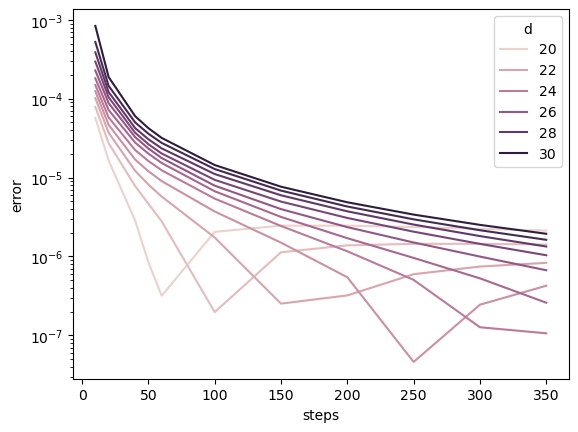

In [55]:
fig, ax = plt.subplots()
ax.set_yscale("log")
sns.lineplot(ax=ax, data=df_small, x="steps", y="error", hue="d")
plt.show()

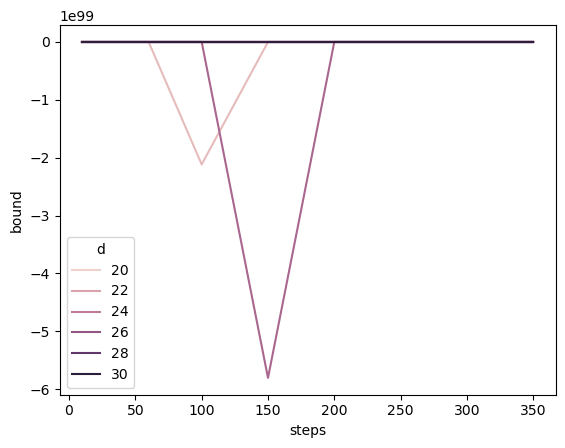

In [56]:
fig2, ax2 = plt.subplots()
ax.set_yscale("log")
sns.lineplot(ax=ax2, data=df_small, x="steps", y="bound", hue="d")
plt.show()

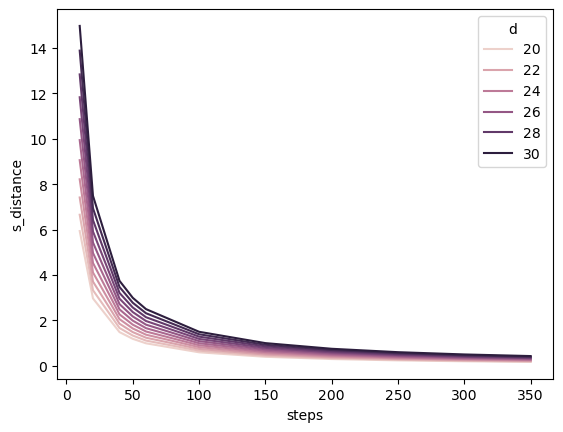

In [58]:
fig3, ax3 = plt.subplots()
ax.set_yscale("log")
sns.lineplot(ax=ax3, data=df_small, x="steps", y="s_distance", hue="d")
plt.show()